# Mapping 

Transportation is about getting from place A to place B.  Therefore, most transportation data has a spatial component to it.  It is nice to be able to put these data on a map and see what is going on.  It is even better if we can put it on a map and interact with the data.  It would be even cooler if we could put our interactive map on a website to show it off!

To do this, we are going to use a package called folium.  You can find the documentation here: 

https://folium.readthedocs.io/en/latest/

And access it on github here: 

https://github.com/python-visualization/folium


### Credits

This lesson draws from the folium quickstart notebook, and from Vik Paruchuri DataQuest lesson: 

https://www.dataquest.io/blog/python-data-visualization-libraries/

### A side note on static mapping

Sometimes you may want to create a static map instead of an interactive map.  Interactive maps are nice for exploring your data, but static maps work well for an image that you can insert into a paper.  If you want to create static maps, then basemap is a good tool.  Here is a nice lesson focused on mapping earthquake activity: 

http://introtopython.org/visualization_earthquakes.html



### OK, back to interactive mapping, because that's fun...

It turns out that folium doesn't do much itself.  It is just a wrapper around something called leafletjs.  You can read more about that here:

http://leafletjs.com/index.html

Leaflet is a library in the JavaScript language.  JavaScript is the language used for most web applications.  We could do the same thing using JavaScript and leaflet directly, but then we would have to learn the syntax for another language.  That might not be too hard, but to keep it simple, we'll stick to the python wrapper for now.  It is good to be aware of, though, because if you want more options than folium allows, you can go directly to leaflet.  

What makes this possible is the fact that leaflet has a well-defined API.  That means that we can pass data back and forth, even from a different language.  


In [2]:
import folium

In [3]:
m = folium.Map(location=[41.8781,-87.6298])

In [4]:
m

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import geopandas as gp
from scipy import stats, integrate
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [7]:
# These files use \N as a missing value indicator.  When reading the CSVs, we will tell
# it to use that value as missing or NA.  The double backslash is required because
# otherwise it will interpret \N as a carriage return.
trips = pd.read_csv("/Users\Daniel\Desktop\CE 599\ce_599_new\METRA-Rail-Delay-Study/trip.csv", header=None, na_values='\\N')
trips.columns = ["time", "time_formated", "id", "route_id", "vehicle_id", "vehicle_label", "delay", "lat", "lon", "general_weather", "temp", "temp_min", "temp_max", "visibility", "wind_speed"]
trips["time_formated"]=pd.to_datetime(trips["time_formated"])

In [45]:
trips['time_new']=pd.to_datetime(trips['time_formated'],format='%H:%M:%S').dt.time
trips

,time,time_formated,id,route_id,vehicle_id,vehicle_label,delay,lat,lon,general_weather,temp,temp_min,temp_max,visibility,wind_speed,time_new
0,1554009576,2019-04-24 00:19:36,UP-N_UN835_V6_B,UP-N,8413,835,300,42.346638,-87.829590,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.60,00:19:36
1,1554009576,2019-04-24 00:19:36,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.845730,-87.738174,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.70,00:19:36
2,1554009608,2019-04-24 00:20:08,UP-N_UN835_V6_B,UP-N,8413,835,300,42.353279,-87.828880,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.60,00:20:08
3,1554009608,2019-04-24 00:20:08,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.847168,-87.732002,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.70,00:20:08
4,1554009639,2019-04-24 00:20:39,UP-N_UN835_V6_B,UP-N,8413,835,300,42.356483,-87.828545,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.60,00:20:39
5,1554009639,2019-04-24 00:20:39,BNSF_BN1328_V6_B,BNSF,8584,1328,240,41.848778,-87.724808,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.70,00:20:39
6,1554009670,2019-04-24 00:21:10,UP-N_UN835_V6_B,UP-N,8413,835,300,42.357857,-87.828392,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.60,00:21:10
7,1554009670,2019-04-24 00:21:10,BNSF_BN1328_V6_B,BNSF,8584,1328,240,41.850452,-87.717232,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.70,00:21:10
8,1554009702,2019-04-24 00:21:42,UP-N_UN835_V6_B,UP-N,8413,835,300,42.357857,-87.828392,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.60,00:21:42
9,1554009702,2019-04-24 00:21:42,BNSF_BN1328_V6_B,BNSF,8584,1328,180,41.852768,-87.706955,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.70,00:21:42


In [8]:
# let's peek at what we have
trips.head()

,time,time_formated,id,route_id,vehicle_id,vehicle_label,delay,lat,lon,general_weather,temp,temp_min,temp_max,visibility,wind_speed
0,1554009576,2019-04-24 00:19:36,UP-N_UN835_V6_B,UP-N,8413,835,300,42.346638,-87.829590,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6
1,1554009576,2019-04-24 00:19:36,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.845730,-87.738174,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7
2,1554009608,2019-04-24 00:20:08,UP-N_UN835_V6_B,UP-N,8413,835,300,42.353279,-87.828880,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6
3,1554009608,2019-04-24 00:20:08,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.847168,-87.732002,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7
4,1554009639,2019-04-24 00:20:39,UP-N_UN835_V6_B,UP-N,8413,835,300,42.356483,-87.828545,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6


In [9]:
trips = trips[:1000]

In [10]:
for name, row in trips.iterrows():
    marker = folium.CircleMarker([row['lat'], row['lon']], radius=2, popup=str(row['delay']))
    marker.add_to(m)

In [11]:
m

In [12]:
for name, row in trips.iterrows():
    
    if row["id"] != "Rogers Park":
        marker = folium.CircleMarker([row["lat"], row["lon"]], 
                                     radius=5,
                                     color='Chartreuse',
                                     fill_color='Chartreuse', 
                                     popup=row['id'])
        marker.add_to(m)
        
         
m.save('m.html')

In [13]:
# create a basic map, centered on Chicago Metra Rail
chicago_air = folium.Map(
    location=[42.328,-87.837],
    tiles='Stamen Toner',
    zoom_start=4
)

In [14]:
# Define some empty sets
delay_set = set()
time_set = set()

# Make sure we don't add duplicates, especially for the origins
for name, row in trips.iterrows():
    
    if row['delay'] not in delay_set: 
        popup_string = str(row['delay']) + ' (' + str(row['delay']) + ')'
        marker = folium.CircleMarker([row["lat"], row["lon"]], 
                                     color='Brown',
                                     fill_color='Brown', 
                                     radius=5, popup=popup_string)
        marker.add_to(m)
        delay_set.add(row['delay'])
    
    if row['delay'] not in time_set: 
        popup_string = str(row['time']) + '(' + str(row['delay']) + ')'
        marker = folium.CircleMarker([row["lat"], row["lon"]], 
                                     color='MidnightBlue',
                                     fill_color='MidnightBlue', 
                                     radius=5, popup=popup_string)
        marker.add_to(m)
        time_set.add(row['delay'])

m.save('m.html')
  

In [15]:
trips.delay.value_counts()

0      336
120    148
180    134
60     126
240    121
300     67
540     24
360     22
480     16
420      6
Name: delay, dtype: int64

In [16]:
trips_new = trips[trips['delay']>0]
trips_new

,time,time_formated,id,route_id,vehicle_id,vehicle_label,delay,lat,lon,general_weather,temp,temp_min,temp_max,visibility,wind_speed
0,1554009576,2019-04-24 00:19:36,UP-N_UN835_V6_B,UP-N,8413,835,300,42.346638,-87.829590,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6
1,1554009576,2019-04-24 00:19:36,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.845730,-87.738174,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7
2,1554009608,2019-04-24 00:20:08,UP-N_UN835_V6_B,UP-N,8413,835,300,42.353279,-87.828880,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6
3,1554009608,2019-04-24 00:20:08,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.847168,-87.732002,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7
4,1554009639,2019-04-24 00:20:39,UP-N_UN835_V6_B,UP-N,8413,835,300,42.356483,-87.828545,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6
5,1554009639,2019-04-24 00:20:39,BNSF_BN1328_V6_B,BNSF,8584,1328,240,41.848778,-87.724808,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7
6,1554009670,2019-04-24 00:21:10,UP-N_UN835_V6_B,UP-N,8413,835,300,42.357857,-87.828392,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6
7,1554009670,2019-04-24 00:21:10,BNSF_BN1328_V6_B,BNSF,8584,1328,240,41.850452,-87.717232,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7
8,1554009702,2019-04-24 00:21:42,UP-N_UN835_V6_B,UP-N,8413,835,300,42.357857,-87.828392,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6
9,1554009702,2019-04-24 00:21:42,BNSF_BN1328_V6_B,BNSF,8584,1328,180,41.852768,-87.706955,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7


In [17]:
def delaycolors(counter):
    if counter['delay'] == 60:
        return 'green'
    elif counter['delay'] == 120:
        return 'blue'
    elif counter['delay'] == 180:
        return 'red'
    elif counter['delay'] == 240:
        return 'white'
    elif counter['delay'] == 300:
        return 'pink'
    elif counter['delay'] == 360:
        return 'purple'
    elif counter['delay'] == 420:
        return 'black'
    elif counter['delay'] == 480:
        return 'orange'
    elif counter['delay'] == 540:
        return 'beige'
    else:
        return 'darkblue'
trips_new["color"] = trips_new.apply(delaycolors, axis=1)
trips_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,time,time_formated,id,route_id,vehicle_id,vehicle_label,delay,lat,lon,general_weather,temp,temp_min,temp_max,visibility,wind_speed,color
0,1554009576,2019-04-24 00:19:36,UP-N_UN835_V6_B,UP-N,8413,835,300,42.346638,-87.829590,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6,pink
1,1554009576,2019-04-24 00:19:36,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.845730,-87.738174,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7,pink
2,1554009608,2019-04-24 00:20:08,UP-N_UN835_V6_B,UP-N,8413,835,300,42.353279,-87.828880,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6,pink
3,1554009608,2019-04-24 00:20:08,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.847168,-87.732002,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7,pink
4,1554009639,2019-04-24 00:20:39,UP-N_UN835_V6_B,UP-N,8413,835,300,42.356483,-87.828545,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6,pink


In [18]:
# Define some empty sets
delay_set = set()
time_set = set()

# Make sure we don't add duplicates, especially for the origins
for name, row in trips_new.iterrows():
    
    
    popup_string = str(row['delay']) + ' (' + str(row['delay']) + ')'
    marker = folium.CircleMarker([row["lat"], row["lon"]], 
                                 radius=5, color=row['color'], fill_color=row['color'], popup=popup_string)
    marker.add_to(m)
        
        

m.save('m.html')

In [19]:
trips_new

,time,time_formated,id,route_id,vehicle_id,vehicle_label,delay,lat,lon,general_weather,temp,temp_min,temp_max,visibility,wind_speed,color
0,1554009576,2019-04-24 00:19:36,UP-N_UN835_V6_B,UP-N,8413,835,300,42.346638,-87.829590,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6,pink
1,1554009576,2019-04-24 00:19:36,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.845730,-87.738174,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7,pink
2,1554009608,2019-04-24 00:20:08,UP-N_UN835_V6_B,UP-N,8413,835,300,42.353279,-87.828880,"[{'id': 802, 'main': 'Clouds', 'description': ...",271.76,270.15,273.15,16093.0,3.6,pink
3,1554009608,2019-04-24 00:20:08,BNSF_BN1328_V6_B,BNSF,8584,1328,300,41.847168,-87.732002,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7,pink
4,1554009639,2019-04-24 00:20:39,UP-N_UN835_V6_B,UP-N,8413,835,300,42.356483,-87.828545,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6,pink
5,1554009639,2019-04-24 00:20:39,BNSF_BN1328_V6_B,BNSF,8584,1328,240,41.848778,-87.724808,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7,white
6,1554009670,2019-04-24 00:21:10,UP-N_UN835_V6_B,UP-N,8413,835,300,42.357857,-87.828392,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6,pink
7,1554009670,2019-04-24 00:21:10,BNSF_BN1328_V6_B,BNSF,8584,1328,240,41.850452,-87.717232,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.23,271.48,273.15,16093.0,6.7,white
8,1554009702,2019-04-24 00:21:42,UP-N_UN835_V6_B,UP-N,8413,835,300,42.357857,-87.828392,"[{'id': 803, 'main': 'Clouds', 'description': ...",271.75,270.15,273.15,16093.0,2.6,pink
9,1554009702,2019-04-24 00:21:42,BNSF_BN1328_V6_B,BNSF,8584,1328,180,41.852768,-87.706955,"[{'id': 803, 'main': 'Clouds', 'description': ...",272.22,271.48,273.15,16093.0,6.7,red


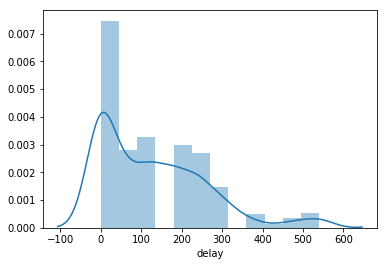

In [20]:
sns.distplot(trips['delay'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


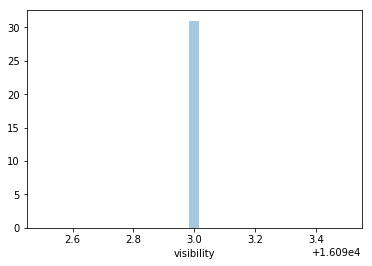

In [21]:
sns.distplot(trips['visibility'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


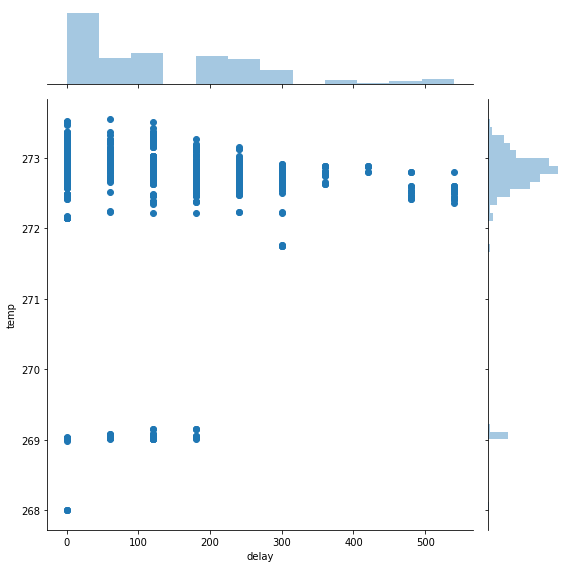

In [22]:
sns.jointplot(x="delay", y="temp", data=trips, size=8)

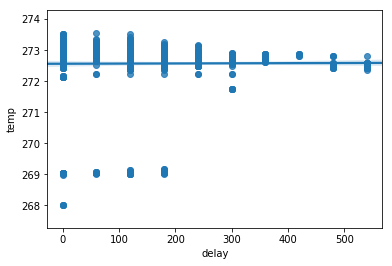

In [23]:
sns.regplot(x="delay", y="temp", data=trips)

In [24]:
mod = smf.ols(formula='delay ~ temp', data=trips)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  delay   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04023
Date:                Wed, 24 Apr 2019   Prob (F-statistic):              0.841
Time:                        10:36:50   Log-Likelihood:                -6309.8
No. Observations:                1000   AIC:                         1.262e+04
Df Residuals:                     998   BIC:                         1.263e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -103.8484   1164.167     -0.089      0.9

In [25]:
trips.general_weather.value_counts()

[{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}]            749
[{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}]          116
[{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}]    111
[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]        20
[{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}]       4
Name: general_weather, dtype: int64

In [26]:
mod = smf.ols(formula='delay ~ route_id', data=trips)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  delay   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     97.69
Date:                Wed, 24 Apr 2019   Prob (F-statistic):          2.01e-108
Time:                        10:36:51   Log-Likelihood:                -6047.7
No. Observations:                1000   AIC:                         1.211e+04
Df Residuals:                     992   BIC:                         1.215e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           232.6718      8.98

In [27]:
str("route_id")

'route_id'

In [28]:
trips.route_id.value_counts()

ME       206
MD-N     133
BNSF     131
UP-NW    126
RI       120
UP-W     114
MD-W     109
UP-N      61
Name: route_id, dtype: int64

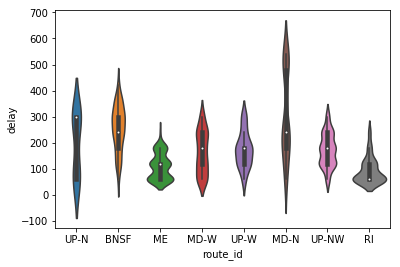

In [29]:
ax = sns.violinplot(x="route_id", y="delay", data=trips_new)

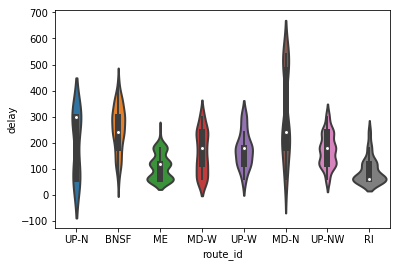

In [30]:
sns.violinplot( x=trips_new["route_id"], y=trips_new["delay"], linewidth=2)

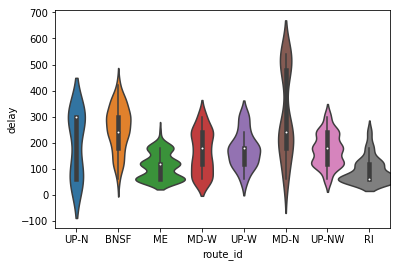

In [31]:
sns.violinplot( x=trips_new["route_id"], y=trips_new["delay"], width=1.5)

Text(0, 0.5, 'Delay')

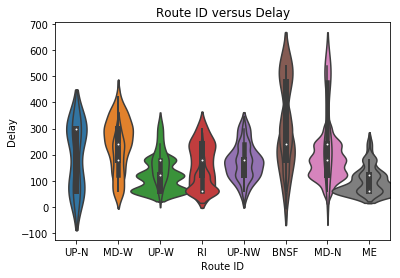

In [32]:
ax = sns.violinplot(x="route_id", y="delay", data=trips_new)
sns.violinplot( x=trips_new["route_id"], y=trips_new["delay"], linewidth=2)
sns.violinplot( x=trips_new["route_id"], y=trips_new["delay"], width=1.8)
sns.violinplot(x='route_id', y='delay', data=trips_new, order=[ "UP-N", "MD-W", "UP-W", "RI", "UP-NW", "BNSF", "MD-N", "ME"])

plt.title('Route ID versus Delay')
plt.xlabel('Route ID')
plt.ylabel('Delay')

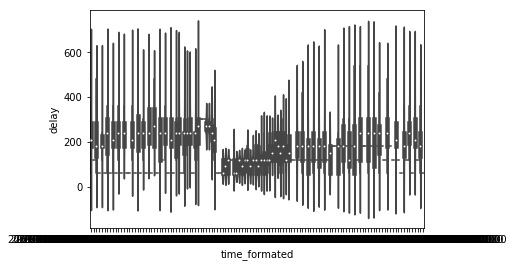

In [33]:
sns.violinplot(x="time_formated", y="delay", data=trips_new)

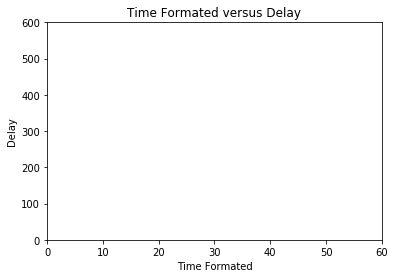

In [34]:
plt.title('Time Formated versus Delay')
plt.xlabel('Time Formated')
plt.ylabel('Delay')
 
# Limits for the Y axis
plt.ylim(0,600)
plt.xlim(0,60)
 
# Create names
plt.xticks()
 
# Show graphic
plt.show()


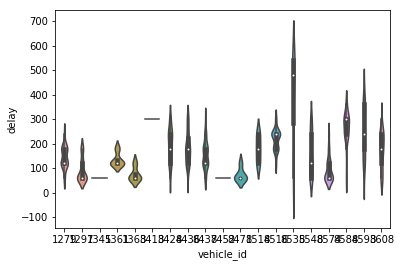

In [36]:
sns.violinplot(x="vehicle_id", y="delay", data=trips_new)

In [37]:
trips.vehicle_id.value_counts()

1297    95
8535    72
8574    68
8548    68
8452    68
8593    68
8584    63
8424    63
8437    63
8471    55
8436    46
8516    43
8608    40
1345    34
1363    34
8504    31
1279    31
8556    21
8514    18
1361    12
8413     6
8508     1
Name: vehicle_id, dtype: int64

In [38]:
trips_new['delay'].groupby([trips_new['route_id'],trips_new['vehicle_id']]).describe()

count        mean         std    min    25%    50%  \
route_id vehicle_id                                                       
BNSF     8584         51.0  267.058824   63.852772   60.0  240.0  300.0   
         8593         68.0  247.941176   99.918755   60.0  180.0  240.0   
MD-N     8514         12.0  180.000000   51.168172  120.0  120.0  180.0   
         8516         42.0  218.571429   41.529973  120.0  180.0  240.0   
         8535         60.0  398.000000  185.497956   60.0  285.0  480.0   
MD-W     8548         65.0  158.769231   85.796046   60.0   60.0  120.0   
         8608         38.0  175.263158   70.278859   60.0  120.0  180.0   
ME       1279         27.0  144.444444   41.633320   60.0  120.0  120.0   
         1297         49.0   90.612245   46.025725   60.0   60.0   60.0   
         1345          1.0   60.000000         NaN   60.0   60.0   60.0   
         1361         12.0  135.000000   27.136021  120.0  120.0  120.0   
         1363          8.0   75.000000   27.774603   60.0   60.0   60.0   
RI       8574         49.0   93.061224   49.083436   60.0   60.0   60.0   
UP-N     8413          6.0  300.000000    0.000000  300.0  300.0  300.0   
         8471          5.0   72.000000   26.832816   60.0   60.0   60.0   
UP-NW    8424         59.0  194.237288   66.233739   60.0  120.0  180.0   
         8437         63.0  153.333333   53.641582   60.0  120.0  120.0   
UP-W     8436         46.0  181.304348   62.596013   60.0  120.0  180.0   
         8452          3.0   60.000000    0.000000   60.0   60.0   60.0   

                       75%    max  
route_id vehicle_id                
BNSF     8584        300.0  360.0  
         8593        360.0  420.0  
MD-N     8514        240.0  240.0  
         8516        240.0  300.0  
         8535        540.0  540.0  
MD-W     8548        240.0  300.0  
         8608        240.0  300.0  
ME       1279        180.0  240.0  
         1297        120.0  180.0  
         1345         60.0   60.0  
         1361        135.0  180.0  
         1363         75.0  120.0  
RI       8574        120.0  240.0  
UP-N     8413        300.0  300.0  
         8471         60.0  120.0  
UP-NW    8424        240.0  300.0  
         8437        180.0  300.0  
UP-W     8436        225.0  300.0  
         8452         60.0   60.0

In [39]:
trips_new['delay'].groupby(trips_new['vehicle_id']).describe()

,count,mean,std,min,25%,50%,75%,max
vehicle_id,,,,,,,,
1279,27.0,144.444444,41.633320,60.0,120.0,120.0,180.0,240.0
1297,49.0,90.612245,46.025725,60.0,60.0,60.0,120.0,180.0
1345,1.0,60.000000,NaN,60.0,60.0,60.0,60.0,60.0
1361,12.0,135.000000,27.136021,120.0,120.0,120.0,135.0,180.0
1363,8.0,75.000000,27.774603,60.0,60.0,60.0,75.0,120.0
8413,6.0,300.000000,0.000000,300.0,300.0,300.0,300.0,300.0
8424,59.0,194.237288,66.233739,60.0,120.0,180.0,240.0,300.0
8436,46.0,181.304348,62.596013,60.0,120.0,180.0,225.0,300.0
8437,63.0,153.333333,53.641582,60.0,120.0,120.0,180.0,300.0
